In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('patient_response_data.csv', index_col='Unnamed: 0')
#df.head()

In [35]:
#check for missing values
df.isnull().sum()

patient_0    18
patient_1    37
patient_2    28
patient_3    15
patient_4    34
patient_5    31
patient_6    29
patient_7    21
patient_8    37
patient_9    32
dtype: int64

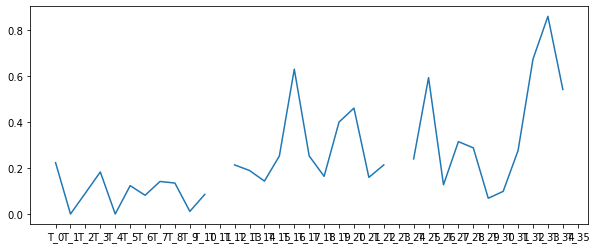

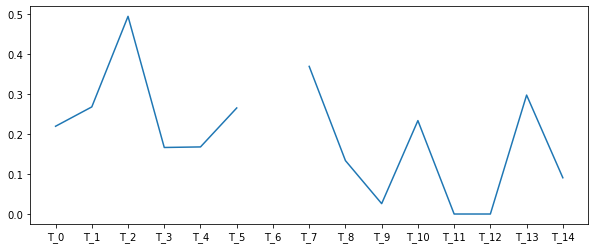

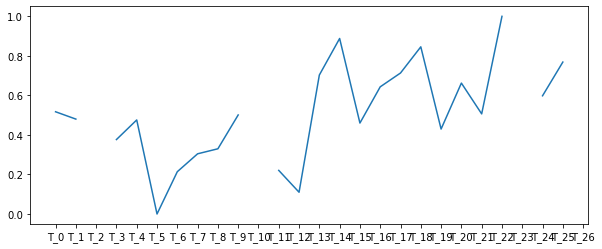

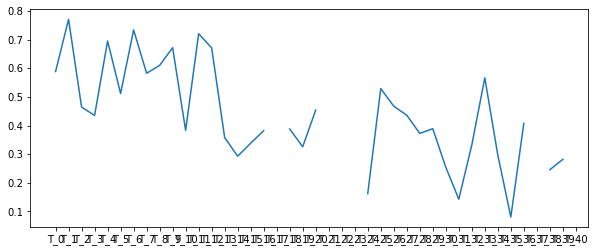

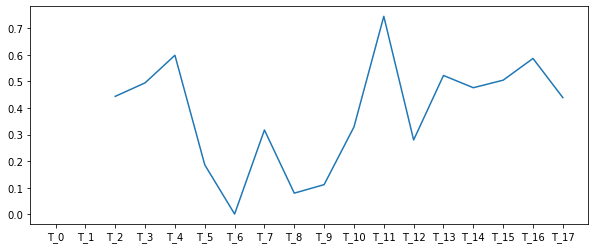

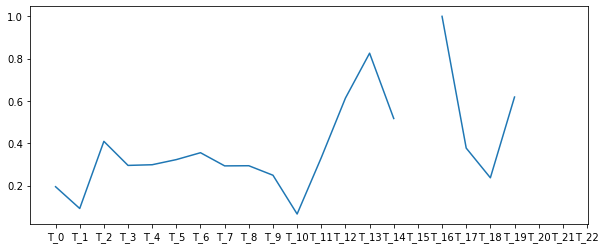

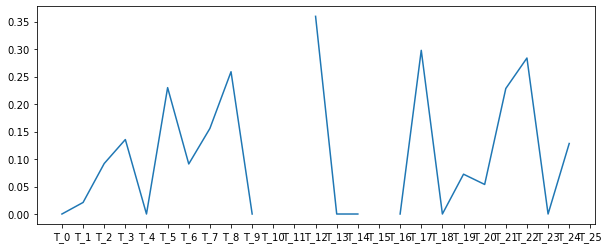

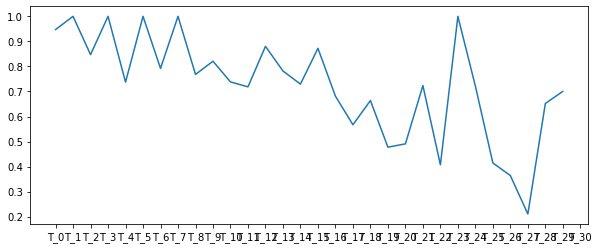

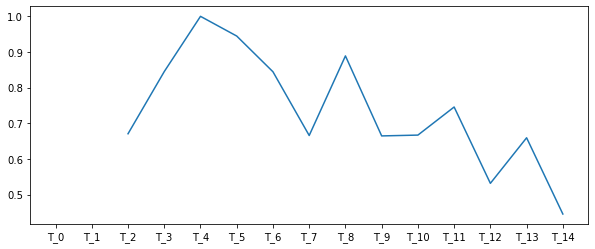

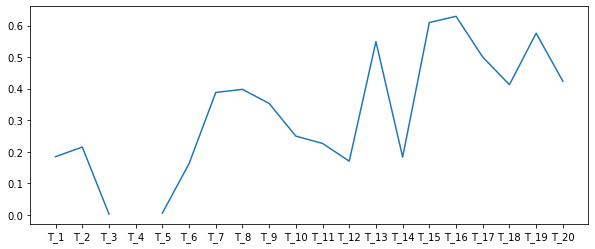

In [32]:
#plot initial data for all patients
def my_plot(df, column):
    plt.figure(figsize=(10,4))
    plt.plot(df[column])

    
for col in df.columns:
    my_plot(df, col)

In [34]:
#Interpolate the data using linear method
new_df = df.interpolate(method='linear', limit=5)

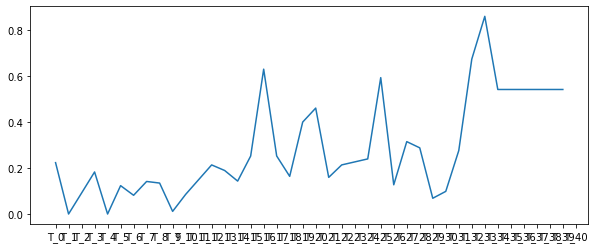

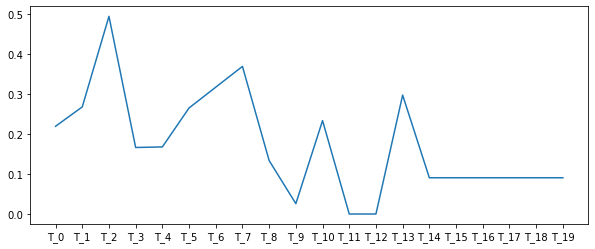

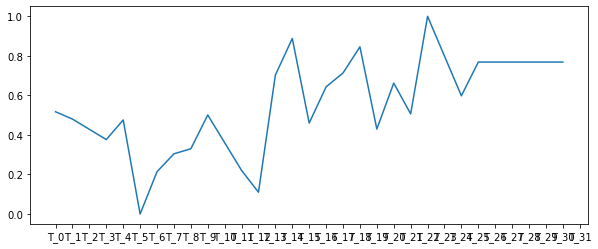

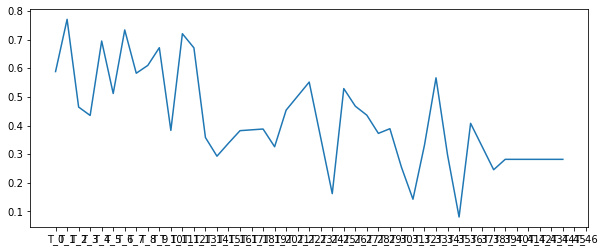

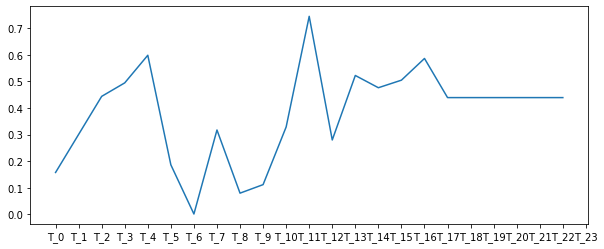

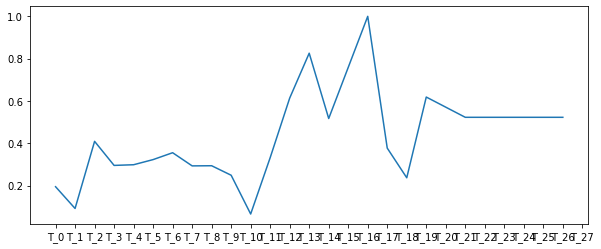

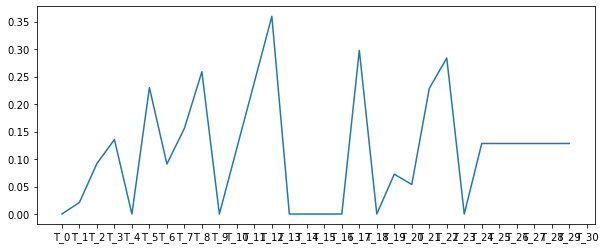

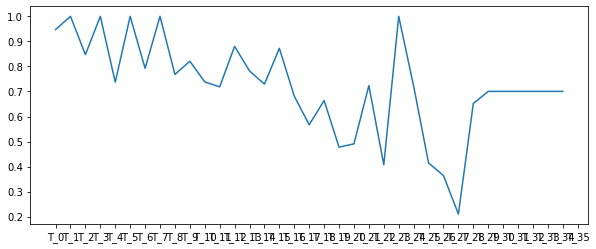

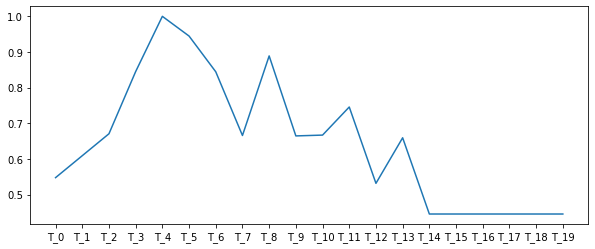

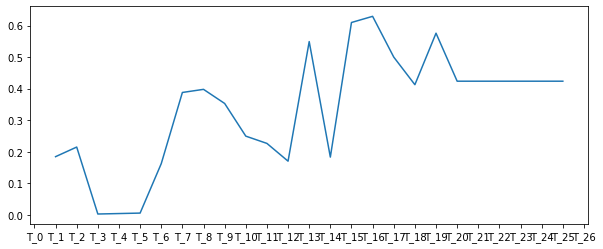

In [30]:
#plot the interpolated data showing filled values
def my_plot(df, column):
    plt.figure(figsize=(10,4))
    plt.plot(df[column])

    
for col in df.columns:
    my_plot(new_df, col)

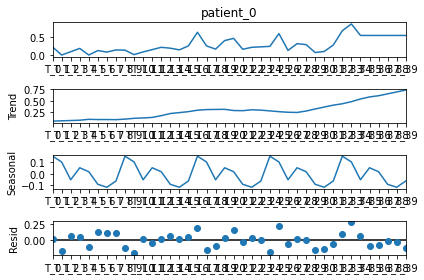

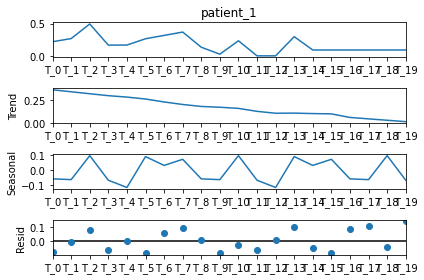

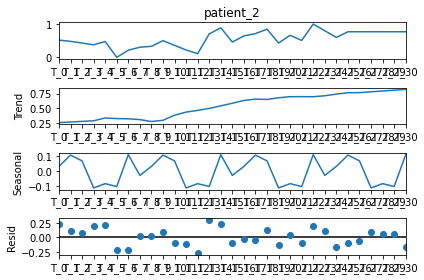

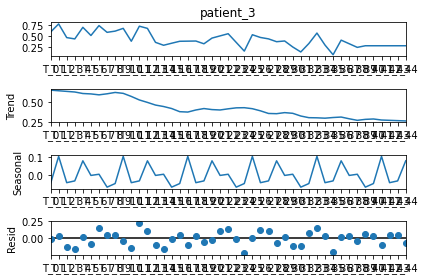

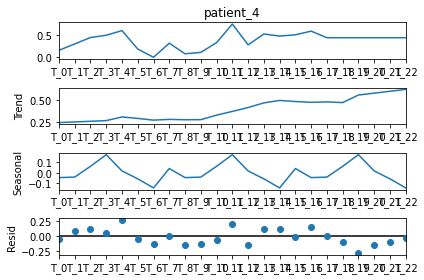

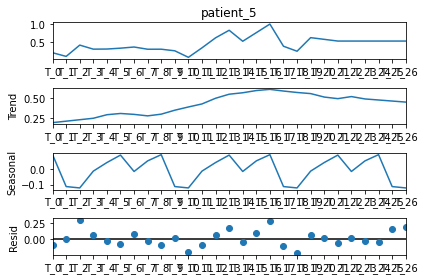

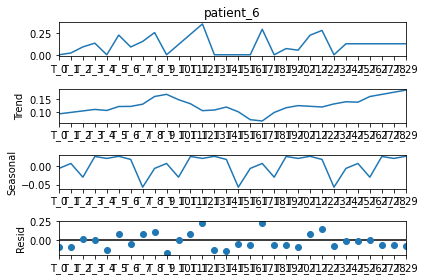

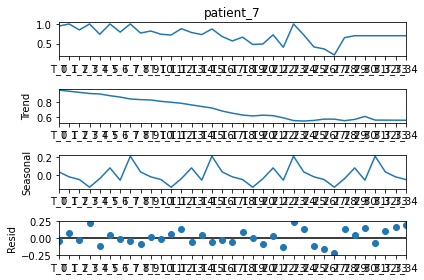

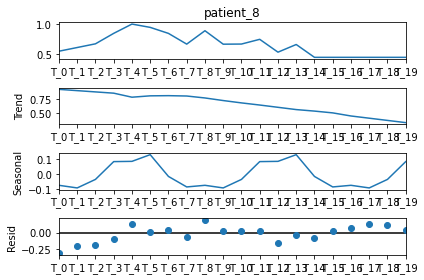

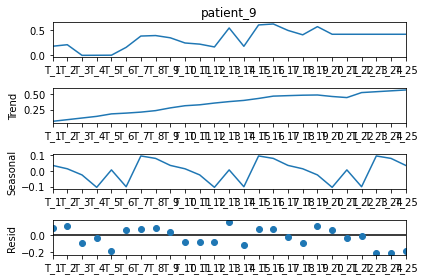

In [36]:
#perform trend decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

for col in df.columns:
    
    decompose = seasonal_decompose(new_df[col][new_df[col].isnull() == False], model='additive', period=8, 
                                   extrapolate_trend='freq').plot()

OBSERVATIONS

From the decomposed plots showing level, trend, seasonality and residual, a few things can be observed from each patients:

1. Patients 0,2 and 5 showed considerable upward trend in serum concentration at administration of treatment at T_7
2. Patient 3 showed a downward trend after administration at T_7
3. Patients 1,7 and 8 showed a downward trend of serum concentration irrespective of administration at T_7
4. Patient 9 also showed no effect to treatment administration as it maintained an upward trend
5. Patient 6 showed a decrease at just after T_7 but continued in upward trend at T_17
6. Patient 4 didn't show changes after treatment until T_9 when the serum concentration maintained upward trend